In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

In [2]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


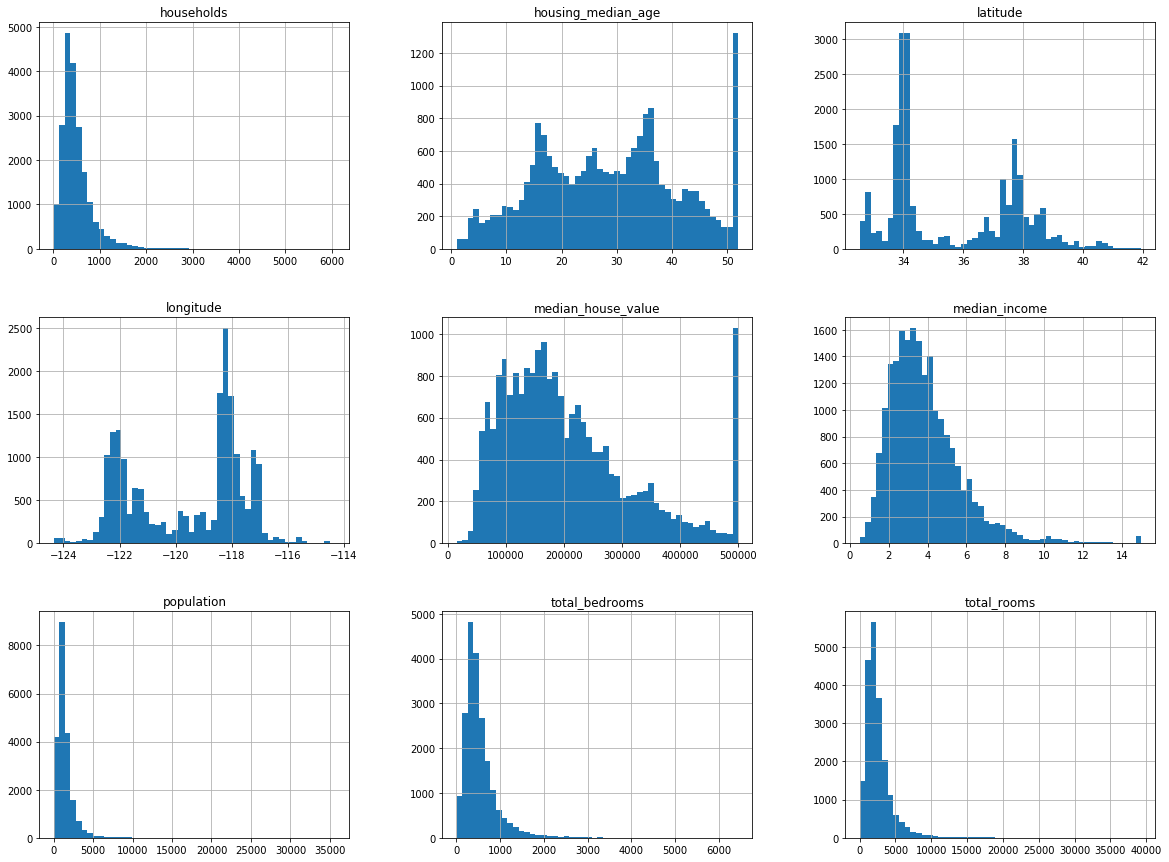

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set,test_set=train=train_test_split(housing,test_size=0.2,random_state=42)

In [12]:
import numpy as np
housing["income_cat"]=np.ceil(housing['median_income']/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

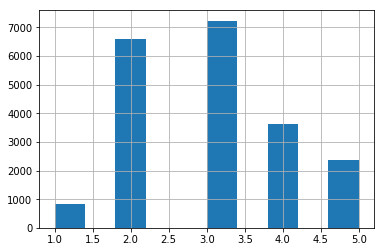

In [13]:
housing['income_cat'].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_train_set.groupby(['income_cat']).count()['longitude']/strat_train_set.count()['longitude']

income_cat
1.0    0.039850
2.0    0.318859
3.0    0.350594
4.0    0.176296
5.0    0.114402
Name: longitude, dtype: float64

In [16]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [17]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [18]:
hst=strat_train_set.copy()

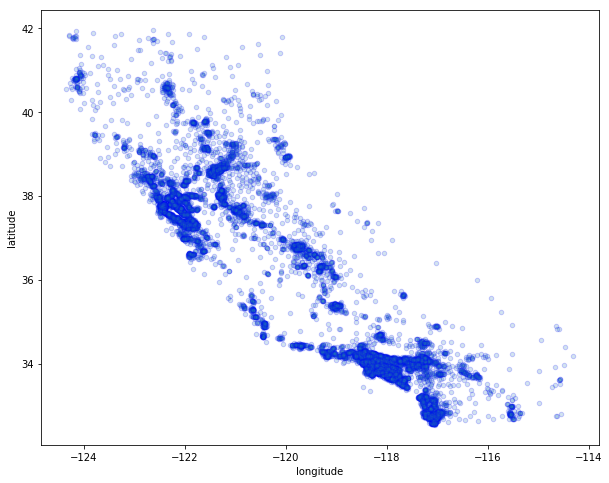

In [19]:
hst.plot(kind="scatter",x="longitude",y="latitude",figsize=(10,8),marker='o',edgecolors='b',alpha=0.2)
plt.show()
hst.plot?

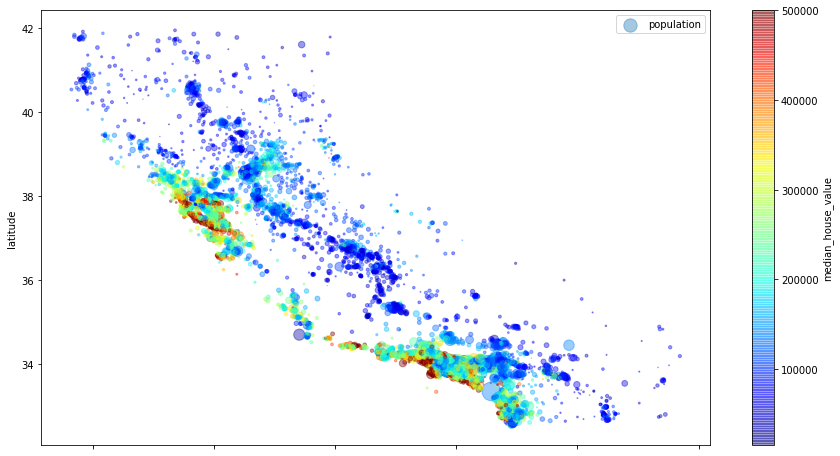

In [20]:
hst.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
        s=hst["population"]/100,label="population",figsize=(15,8),
        c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

In [21]:
corr_matrix=hst.corr()
abs(corr_matrix['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
latitude              0.142724
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
longitude             0.047432
population            0.026920
Name: median_house_value, dtype: float64

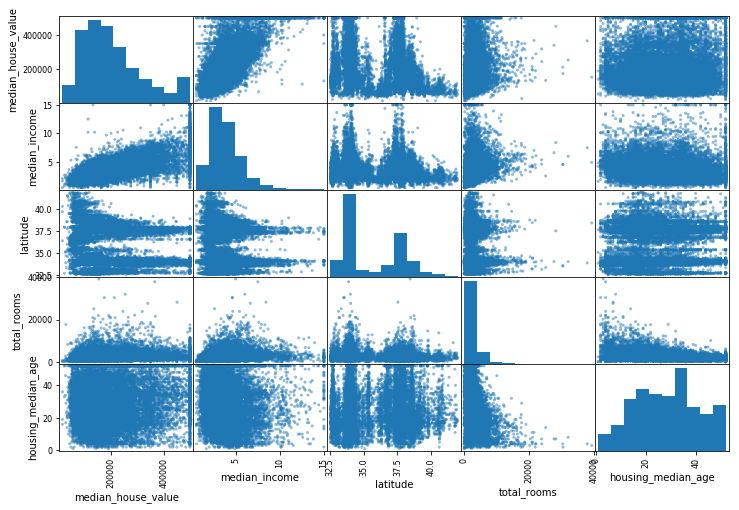

In [22]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','latitude','total_rooms','housing_median_age']
scatter_matrix(hst[attributes],figsize=(12,8))
plt.show()

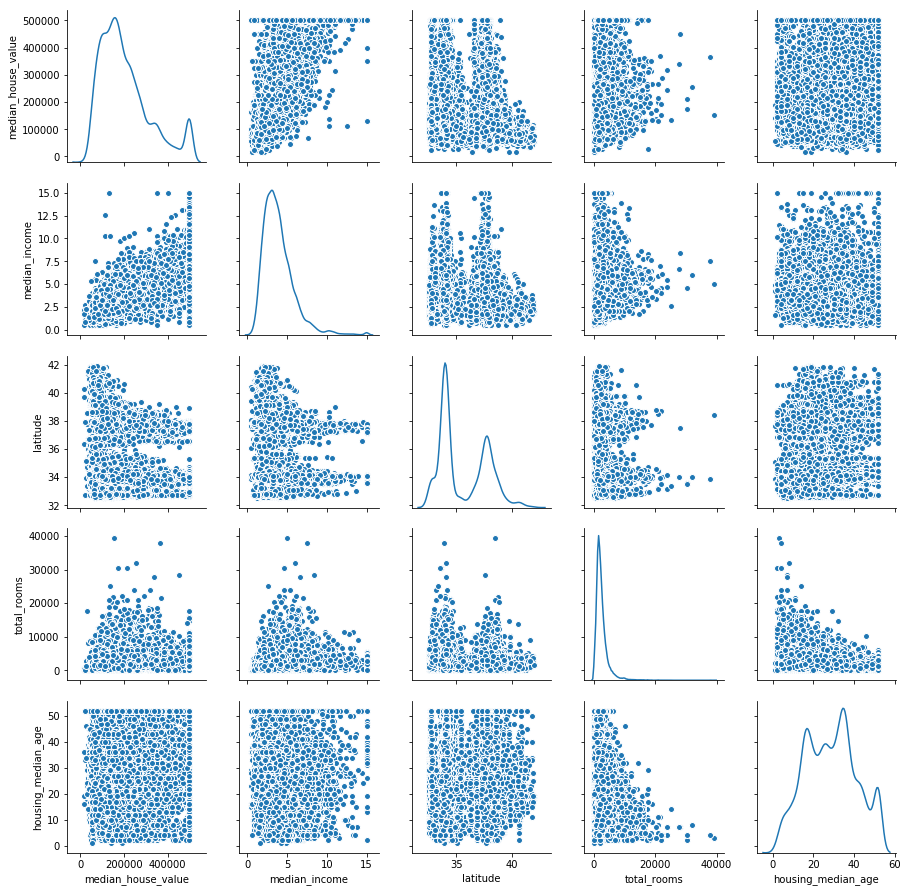

In [23]:
import seaborn as sns
sns.pairplot(hst[attributes],diag_kind='kde')
plt.show()

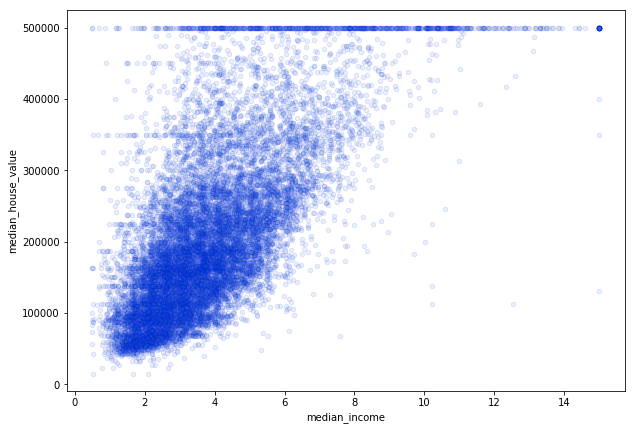

In [24]:
hst.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,edgecolors='b',marker='o',figsize=(10,7))
plt.show()

In [25]:
hst['rooms_per_household']=hst['total_rooms']/hst['households']
hst['bedrooms_per_room']=hst['total_bedrooms']/hst['total_rooms']
hst['population_per_household']=hst['population']/hst['households']

In [26]:
corr_matrix=hst.corr()
abs(corr_matrix['median_house_value']).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
bedrooms_per_room           0.259984
rooms_per_household         0.146285
latitude                    0.142724
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
longitude                   0.047432
population                  0.026920
population_per_household    0.021985
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algo

In [27]:
hst_labels=strat_train_set['median_house_value'].copy()
hst=strat_train_set.drop("median_house_value",axis=1)

hst.dropna(subset=['total_bedrooms'])#option1
hst.drop('total_bedrooms',axis=1)#option2 
median=hst['total_bedrooms'].median() #option 3
hst['total_bedrooms'].fillna(median,inplace=True)

In [84]:
# creating Imputer instance
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [85]:
# since median can only be  computed on numerical attribute 
hst_num=hst.drop("ocean_proximity",axis=1)

In [86]:
# Fitting Imputer attribute
imputer.fit(hst_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [87]:
# Imputer store results in statitics_ instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [88]:
#Now we use trained imputer to transform the training set by replacing missing values by learned medians
X=imputer.transform(hst_num)
# result is a plain Numpy array containing the transformed features
# to put it back into a Pandas Dataframe it is simple

hst_tr=pd.DataFrame(X,columns=hst_num.columns)



### Encoding

In [89]:
hst_cat=hst[['ocean_proximity']]
hst_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [90]:
#import nltk
import sklearn

#print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# The nltk version is 3.0.0.
# The scikit-learn version is 0.15.2.

The scikit-learn version is 0.20.2.


In [91]:
from sklearn.preprocessing import OrdinalEncoder # Scikit-Learn < 0.20
ordinal_encoder=OrdinalEncoder()
hst_cat_encoded=ordinal_encoder.fit_transform(hst_cat)
hst_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [92]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [93]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
hst_cat_1hot=cat_encoder.fit_transform(hst_cat)
hst_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [94]:
hst_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [95]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [96]:
df=pd.DataFrame(hst_cat_1hot.toarray(),columns=cat_encoder.categories_)
df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [97]:
dummies=pd.get_dummies(hst,columns=['ocean_proximity'])

In [98]:
dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1,0,0,0,0


### Custom Transformers

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

#index
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_rooms=True):
        self.add_bedrooms_per_rooms=add_bedrooms_per_rooms
    def fit(self,X,y=None):
        return self # nothing else to do
    def transform(self,X,y=None):
        rooms_per_households=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_rooms=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_households,population_per_household,bedrooms_per_rooms]
        else:
            return np.c_[X,rooms_per_households,population_per_household]
        
attr_adder=CombinedAttributeAdder(add_bedrooms_per_rooms=False)
housing_extra_attribs=attr_adder.transform(hst.values)

### Transformation Pipelines


In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attributes_adder',CombinedAttributeAdder()),
    ('std_scaler',StandardScaler())
])

hst_num_tr=num_pipeline.fit_transform(hst_num)

In [111]:
list(hst_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [112]:
from sklearn.compose import ColumnTransformer

num_attribs=list(hst_num)
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])
housing_prepared=full_pipeline.fit_transform(hst)


### Training and testing Model

In [113]:
from sklearn.linear_model import LinearRegression

linReg=LinearRegression()
linReg.fit(housing_prepared,hst_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
some_data=hst.iloc[:5]
some_labels=hst_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predictions:",linReg.predict(some_data_prepared))
print("labels:",list(some_labels))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [117]:
from sklearn.metrics import mean_squared_error
housing_predictions=linReg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_predictions,hst_labels)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [118]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,hst_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [119]:
housing_predictions=tree_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_predictions,hst_labels)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.0

In [124]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,hst_labels,
                      scoring='neg_mean_squared_error',cv=10)
tree_rmse_score=np.sqrt(-scores)


In [126]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("sd:",scores.std())
    
display_scores(tree_rmse_score)

Scores: [68842.03188395 66667.31684472 71464.27316233 69108.24652599
 71525.43113816 75275.0239984  69969.82616033 72388.89321976
 75556.33046896 69774.51155363]
Mean: 71057.18849562341
sd: 2664.483160156168


In [128]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(linReg,housing_prepared,hst_labels,
                      scoring='neg_mean_squared_error',cv=10)
lin_rmse_score=np.sqrt(-scores)
display_scores(lin_rmse_score)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
sd: 2731.674001798348


In [131]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,hst_labels)


#Training acc
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_predictions,hst_labels)
forest_rmse=np.sqrt(forest_mse)
print("Training RMSE",forest_rmse)

#CV
scores=cross_val_score(forest_reg,housing_prepared,hst_labels,
                      scoring='neg_mean_squared_error',cv=10)
forest_rmse_score=np.sqrt(-scores)
display_scores(forest_rmse_score)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training RMSE 22585.550768117962
Scores: [52591.47655272 50507.53131794 52722.96476857 54155.84653402
 51930.78662444 56289.54895778 51275.98174297 50997.91365814
 55519.08249139 52390.55330778]
Mean: 52838.168595576404
sd: 1821.8745116252976


#### Save Models In Pickle File

In [ ]:
from sklearn.externals import joblib

joblib.dump(my_model,"my_model.pkl")

## and Later

my_model_loaded=joblib.load("my_model.pkl")

### Fine Tune Models

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]},
]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared,hst_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [144]:
RandomForestRegressor?

In [136]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [138]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64283.84459016679 {'max_features': 2, 'n_estimators': 3}
55413.7911377948 {'max_features': 2, 'n_estimators': 10}
53034.05519889338 {'max_features': 2, 'n_estimators': 30}
59937.052991699056 {'max_features': 4, 'n_estimators': 3}
52409.98763455396 {'max_features': 4, 'n_estimators': 10}
50920.617481844805 {'max_features': 4, 'n_estimators': 30}
59079.27734525371 {'max_features': 6, 'n_estimators': 3}
52280.32756211486 {'max_features': 6, 'n_estimators': 10}
49937.135112989956 {'max_features': 6, 'n_estimators': 30}
58596.19069118451 {'max_features': 8, 'n_estimators': 3}
51627.33888595932 {'max_features': 8, 'n_estimators': 10}
50157.74079769903 {'max_features': 8, 'n_estimators': 30}
61130.620202162085 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54317.744043610204 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60503.097082087406 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52455.93826625807 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [142]:
from sklearn.model_selection import RandomizedSearchCV
RandomizedSearchCV?

# Used when search space is large

### Feature Importance

In [147]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([7.60374501e-02, 7.31024586e-02, 4.32892682e-02, 1.70514224e-02,
       1.66841825e-02, 1.75324180e-02, 1.58882933e-02, 3.30495994e-01,
       6.90721846e-02, 1.11436993e-01, 6.55419706e-02, 1.10778807e-02,
       1.43674862e-01, 1.13207713e-04, 3.20374710e-03, 5.79766685e-03])

In [152]:
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_hhold"]
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attribs=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importance,attribs),reverse=True)

[(0.3304959942707288, 'median_income'),
 (0.1436748618541342, 'INLAND'),
 (0.11143699324991889, 'pop_per_hhold'),
 (0.07603745007711162, 'longitude'),
 (0.07310245862974132, 'latitude'),
 (0.0690721845936335, 'rooms_per_hhold'),
 (0.0655419706030873, 'bedrooms_per_hhold'),
 (0.043289268206327405, 'housing_median_age'),
 (0.017532418004476972, 'population'),
 (0.017051422369172384, 'total_rooms'),
 (0.016684182506980807, 'total_bedrooms'),
 (0.01588829325537803, 'households'),
 (0.011077880715820635, '<1H OCEAN'),
 (0.005797666852015807, 'NEAR OCEAN'),
 (0.003203747098303699, 'NEAR BAY'),
 (0.00011320771316859707, 'ISLAND')]

### Evaluate Model on Test Data

In [155]:
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()


X_test_prepared=full_pipeline.transform(X_test)

final_prediction=final_model.predict(X_test_prepared)

final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse

47607.168501152664

In [158]:
from scipy import stats
confidence = 0.95
squared_errors=(final_prediction-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45623.13587365, 49511.76080942])